# Employee Attrition Analysis!

**Goal**: Analyze employee attrition data to understand what factors lead to employee turnover and predict whether an employee will stay or leave the organization.

**Approach**:
- Perform exploratory data analysis (EDA)
- Preprocess and encode features
- Train multiple machine learning models
- Compare performance using accuracy, recall, F1-score, and ROC AUC

Importing necessary python libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 🔍 Load and Explore the Data

Read the dataset, view its structure, and check for missing values or inconsistencies.

In [3]:
url = "https://raw.githubusercontent.com/shirley-1300/Employee_Attrition_Analysis/refs/heads/main/Sample_Data.csv"
df = pd.read_csv(url)

In [4]:
print('The number of rows are:',df.shape[0])
print('The number of columns are:',df.shape[1])
print(df.info())

The number of rows are: 1470
The number of columns are: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement     

In [7]:
#Distinct values in particular columns
print(df['Attrition'].value_counts())
print(df['StandardHours'].value_counts())
print(df['EmployeeCount'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64
StandardHours
80    1470
Name: count, dtype: int64
EmployeeCount
1    1470
Name: count, dtype: int64


## 📊 Exploratory Data Analysis

Visualize relationships between features and attrition. Focus on categorical and numerical distributions and how they relate to attrition status.

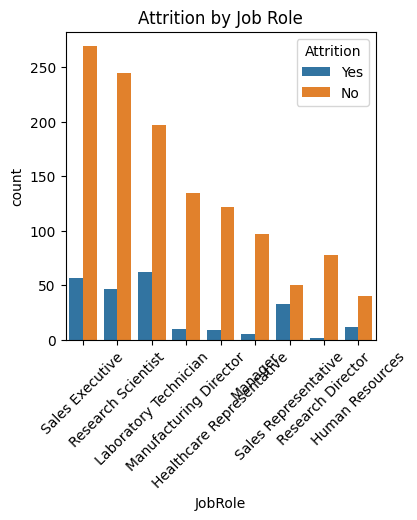

In [8]:
plt.figure(figsize=(4,4))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.show()

#### 📌 Attrition by Gender

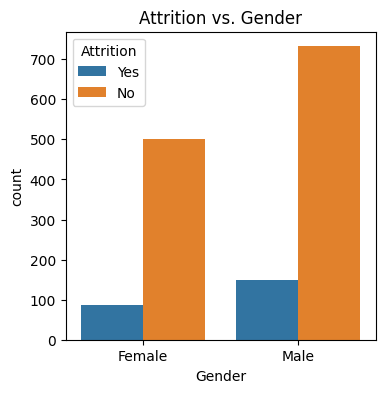

In [9]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition vs. Gender')
plt.show()

## 🛠️ Data Preprocessing

- Convert categorical columns to numeric (via mapping or encoding)
- Drop unnecessary columns (e.g., EmployeeNumber, Over18, StandardHours)
- Handle duplicates and missing values if any

In [10]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [11]:
# Define mappings for each categorical column
business_travel_mapping = {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}
department_mapping = {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}
education_field_mapping = {'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Other':4, 'Human Resources':5}
job_role_mapping = {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}
marital_status_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}

# Apply the mappings to the respective columns
df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)
df['Department'] = df['Department'].map(department_mapping)
df['EducationField'] = df['EducationField'].map(education_field_mapping)
df['JobRole'] = df['JobRole'].map(job_role_mapping)
df['MaritalStatus'] = df['MaritalStatus'].map(marital_status_mapping)

In [12]:
df.drop('Over18', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)
df.drop('EmployeeCount', axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)
df.shape

(1470, 31)

In [13]:
#Finding duplicate entries
duplicates = df.duplicated().sum()
print(f"The number of duplicate rows: {duplicates}")

The number of duplicate rows: 0


## 📏 Feature Scaling

Use MinMaxScaler to scale numeric columns while preserving the structure of categorical data.

In [14]:
from sklearn.preprocessing import MinMaxScaler
# 1. Exclude target + any encoded categorical columns
cols_to_scale = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]
# 2. Apply Min-Max Scaling
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

## ✂️ Train-Test Split

Split the dataset into training and testing sets to evaluate model performance on unseen data.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### 🌳 Model 1: Random Forest

Use a tree-based classifier to handle non-linearity and feature interactions. Also apply class balancing.

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
y_pred = rf.predict(x_test)

## 📈 Model Evaluation

Compare models using:

- Confusion Matrix
- Classification Report (Precision, Recall, F1)
- ROC AUC Score

We are particularly interested in **Recall and F1-score** for the "Attrition = Yes" class (minority class).

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [28]:
print('The confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nThe classification report:')
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nROC AUC Score: {roc_auc:.2f}")

The confusion matrix:
[[377   3]
 [ 56   5]]

The classification report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.62      0.08      0.14        61

    accuracy                           0.87       441
   macro avg       0.75      0.54      0.54       441
weighted avg       0.84      0.87      0.82       441


ROC AUC Score: 0.54


## ⚖️ Improve Minority Class Detection

Use SMOTE to oversample the minority class or apply a custom probability threshold to improve recall for leavers.